In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm

import matplotlib.patches as mpatches

from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

sstyle = 'seaborn-v0_8-poster'
plt.style.use(sstyle)
plt.rc('font',family = 'serif')

coeffs = ['IP', 'BT', 'NEL', 'PLTH', 'RGEO', 'KAREA', 'EPS', 'MEFF']
path = "../../data/"
fig_path = "../../../../LATEX/Latex Images/"

In [3]:
def get_regression(_R, withDB2=False):
    """
    ASSUMING DATA IS ***NOT*** GIVEN IN LOG-SCALE
    """
    if withDB2:
        data = _R.copy()
    else:     
        data = pd.concat([DB2, _R],
                         axis=0, 
                         ignore_index=True
                        )
    Y_ = data[["TAUTH"]].apply(np.log).to_numpy()
    # Adding a column for the intercept
    _df = data[coeffs].apply(np.abs).apply(np.log)
    _df.insert(
        loc = 0, 
        column = "intercept", 
        value = np.ones(len(_df))
    )
    X_ = _df.to_numpy()
    n_, p_ = X_.shape
    model = sm.OLS(Y_,X_)
    regression = model.fit()
    return data, regression, (n_,p_)

#d_, r_, np_ = get_regression(data2, withDB2=False)

In [4]:
# REMARK: There are no spherical TOKAMAKs in these analyses.  

DB2 = pd.read_csv(path+"DB2P8.csv")
DB5 = pd.read_csv(path+"SELDB5_SVD.csv", low_memory=False)

decreased_DB5_ids = pd.read_csv(path+"decreased_DB5.csv")
decreased_DB5 = DB5[DB5.id.isin(decreased_DB5_ids.id_added)]

In [5]:
decreased_DB5

,ind,id,TOK,TOK_ID,DIVNAME,LCUPDATE,DATE,SHOT,TIME,TIME_ID,...,LQ95,LBETATH,database_index,EPS,LCOULOMB,OMEGACYCL,QCYL5,TAUBOHM,BETASTAR,NUSTAR
608,13947,ZUEQ42,AUG,2,DIV-I,20180403,19960502,8006,3.400,3400,...,1.380528,-4.852676,2,0.299159,15.028261,1.254000,3.013448,0.112722,0.819783,0.277214
616,13956,X1F9P2,AUG,2,DIV-I,20180403,19960503,8030,2.550,2550,...,1.345212,-4.563617,2,0.297416,14.709729,1.282000,2.888794,0.066331,1.094550,0.495887
626,13966,4RQGW9,AUG,2,DIV-I,20180403,19960507,8045,2.000,2000,...,1.373716,-4.830026,2,0.298431,15.067062,1.253500,2.981822,0.115184,0.838563,0.254183
635,13975,SCOKNW,AUG,2,DIV-I,20180403,19960509,8092,1.800,1800,...,1.350149,-4.877877,2,0.296026,15.036230,1.487000,2.924405,0.168031,0.799382,0.268479
637,13977,NIJVMQ,AUG,2,DIV-I,20180403,19960509,8092,2.250,2250,...,1.316676,-5.131115,2,0.291916,14.669024,1.487000,2.879855,0.184983,0.620546,0.551965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,24915,AEWB71,START,15,OPEN,20000609,19980303,36080,0.043,43,...,1.641324,-2.641295,2,0.764622,13.730101,0.166529,1.734460,0.000685,7.483237,0.080593
7483,24916,9OQ1PX,START,15,OPEN,20000609,19980327,36429,0.038,38,...,1.711633,-2.445726,2,0.780585,13.495708,0.174353,1.474930,0.000716,9.099639,0.111958
7484,24917,JKURI6,START,15,OPEN,20000609,19980327,36437,0.039,39,...,1.744144,-2.414234,2,0.783113,13.658387,0.171118,1.507336,0.000489,9.390759,0.085860
7516,26411,D26CA1,TFTR,13,NONAME,19980115,19900124,45980,4.600,4600,...,2.085672,-6.229105,2,0.327343,16.013226,2.397500,6.010681,0.415007,0.206978,0.105809


In [6]:
# Getting both DataFrames together: points that decreased the regression

data, regression, NP = get_regression(decreased_DB5, withDB2=False)
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     7863.
Date:                Sat, 22 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:27:27   Log-Likelihood:                 645.21
No. Observations:                3854   AIC:                            -1272.
Df Residuals:                    3845   BIC:                            -1216.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3768      0.033    -71.522      0.000      -2.442      -2.312
x1             1.2642      0.020     63.580      0.000       1.225       1.303
x2             0.0818      0.017      4.845      0.000       0.049       0.115
x3             0.0095      0.012      0.771      0.441      -0.015       0.034
x4            -0.6264      0.010    -63.072      0.000      -0.646      -0.607
x5             1.0538      0.032     33.370      0.000       0.992       1.116
x6             0.2168      0.033      6.487      0.000       0.151       0.282
x7            -0.2248      0.043     -5.169      0.000      -0.310      -0.140
x8             0.1628      0.024      6.846      0.000       0.116       0.209
==============================================================================
Omnibus:                       12.914   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.238
Skew:                          -0.034   Prob(JB):                     0.000298
Kurtosis:                       3.311   Cond. No.                         58.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
influence = regression.get_influence()
infl_summary = influence.summary_frame()

In [8]:
R = decreased_DB5.copy()

## DFBETAs Analysis to `decreased_DB5.csv`

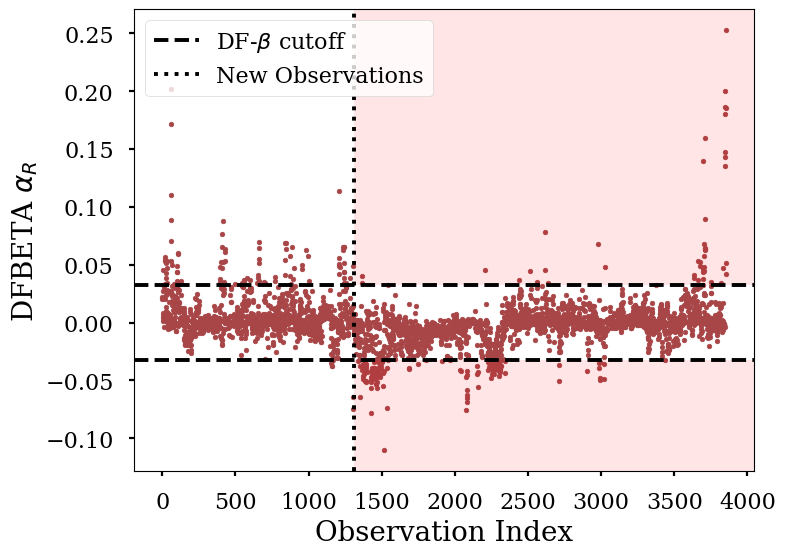

In [9]:
dfbeta_cutoff =  2/(NP[0])**(0.5)
DBβ_αR = infl_summary["dfb_x5"]


plt.figure(figsize=(8,6))

plt.scatter(list(range( len(R)+len(DB2) )), DBβ_αR.values, s=11, c="#A84547")
plt.axhline(dfbeta_cutoff, c="k", ls="--", label="DF-$\\beta$ cutoff")
plt.axhline(-dfbeta_cutoff, c="k", ls="--")
plt.axvline( data[len(DB2):].iloc[0].name, c="k", ls=":", label="New Observations")
plt.xlabel("Observation Index",fontsize=20)
plt.ylabel("DFBETA $\\alpha_R$",fontsize=20)



left, bottom, width, height = (data[len(DB2):].iloc[0].name, 
                               -dfbeta_cutoff, 
                               len(data), 
                               min(DBβ_αR.values)
                              )
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="red")
plt.gca().add_patch(rect)

left, bottom, width, height = (data[len(DB2):].iloc[0].name, 
                               dfbeta_cutoff, 
                               len(data), 
                               max(DBβ_αR.values)
                              )
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="red")
plt.gca().add_patch(rect)

#plt.grid(alpha=0.7)
plt.legend(loc="upper left", frameon=True);

plt.savefig(fig_path+"DFBETA_decreased-DB5.pdf", format="pdf", dpi=800, bbox_inches='tight');

In [10]:
infl_DB5 = DBβ_αR.iloc[len(DB2):]
upper_pts_αR = infl_DB5[(infl_DB5 >=  dfbeta_cutoff)].index
lower_pts_αR = infl_DB5[(infl_DB5 <= -dfbeta_cutoff)].index

infl_pts_αR = list(upper_pts_αR) + list(lower_pts_αR)
id_infl_pts_αR = data.iloc[infl_pts_αR]["id"].values

In [11]:
# Getting both DataFrames together: influential | maximizes
R_αR_infl =  R[R.id.isin(id_infl_pts_αR)]

data_infl_αR, regression_infl_αR, NP_infl_αR = get_regression(R_αR_infl)
regression_infl_αR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     3453.
Date:                Sat, 22 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:27:39   Log-Likelihood:                 168.30
No. Observations:                1499   AIC:                            -318.6
Df Residuals:                    1490   BIC:                            -270.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6095      0.050    -51.907      0.000      -2.708      -2.511
x1             1.0350      0.029     35.207      0.000       0.977       1.093
x2             0.2895      0.028     10.505      0.000       0.235       0.344
x3             0.0973      0.021      4.571      0.000       0.056       0.139
x4            -0.5782      0.016    -36.280      0.000      -0.609      -0.547
x5             1.4627      0.050     29.521      0.000       1.366       1.560
x6             0.3446      0.049      7.051      0.000       0.249       0.440
x7             0.0956      0.062      1.532      0.126      -0.027       0.218
x8             0.1472      0.038      3.872      0.000       0.073       0.222
==============================================================================
Omnibus:                       48.786   Durbin-Watson:                   0.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.938
Skew:                          -0.282   Prob(JB):                     7.22e-18
Kurtosis:                       3.973   Cond. No.                         45.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Getting both DataFrames together: influential | minimizes
R_αR_not_infl =  R[~R.id.isin(id_infl_pts_αR)]

data_not_infl_αR, regression_not_infl_αR, NP_not_infl_αR = get_regression(R_αR_not_infl)
regression_not_infl_αR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     8846.
Date:                Sat, 22 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:27:39   Log-Likelihood:                 968.83
No. Observations:                3665   AIC:                            -1920.
Df Residuals:                    3656   BIC:                            -1864.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3963      0.031    -77.603      0.000      -2.457      -2.336
x1             1.2287      0.019     64.019      0.000       1.191       1.266
x2             0.0302      0.016      1.857      0.063      -0.002       0.062
x3             0.0854      0.012      7.012      0.000       0.061       0.109
x4            -0.6346      0.009    -67.851      0.000      -0.653      -0.616
x5             1.1513      0.031     36.602      0.000       1.090       1.213
x6             0.1428      0.031      4.535      0.000       0.081       0.205
x7            -0.1359      0.042     -3.269      0.001      -0.217      -0.054
x8             0.1704      0.022      7.634      0.000       0.127       0.214
==============================================================================
Omnibus:                       14.645   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.716
Skew:                           0.094   Prob(JB):                     0.000234
Kurtosis:                       3.272   Cond. No.                         61.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Influential Pts Analysis to `decreased_DB5.csv`

In [13]:
infl_summary

,dfb_const,dfb_x1,dfb_x2,dfb_x3,dfb_x4,dfb_x5,dfb_x6,dfb_x7,dfb_x8,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.023383,-0.031287,0.019235,0.009353,0.004175,0.021861,-0.015915,0.025323,-0.008067,0.000602,1.564789,0.002208,0.073611,1.565084,0.073625
1,0.025290,-0.034309,0.020882,0.006137,0.011465,0.020408,-0.018741,0.026356,-0.008708,0.000713,1.671703,0.002290,0.080089,1.672093,0.080108
2,0.021399,-0.017396,0.016653,0.009510,-0.020033,0.021190,-0.002785,0.020244,-0.004986,0.000301,1.071003,0.002354,0.052019,1.071024,0.052020
3,0.040113,-0.043473,0.032882,0.026517,-0.026357,0.045654,-0.012828,0.045286,-0.011118,0.001235,2.171820,0.002351,0.105428,2.172871,0.105479
4,0.029475,-0.042387,0.025084,0.011248,0.012165,0.027024,-0.021970,0.033389,-0.010398,0.000999,1.950803,0.002357,0.094822,1.951515,0.094857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,-0.137184,-0.133780,0.091512,0.077991,0.049834,0.147087,0.070771,0.062047,0.004999,0.012825,-3.263462,0.010721,-0.339737,-3.267566,-0.340164
3850,-0.134404,-0.183478,0.160167,0.045666,0.019796,0.185109,0.165531,0.097161,0.008307,0.016626,-3.652084,0.011094,-0.386822,-3.657959,-0.387444
3851,-0.141803,-0.211703,0.204330,0.097154,-0.071492,0.252845,0.237194,0.137396,-0.000752,0.022274,-4.092298,0.011829,-0.447732,-4.100705,-0.448652
3852,0.052732,-0.051111,0.068391,0.000983,-0.007322,0.042220,0.000618,0.067048,0.009702,0.000932,1.083804,0.007091,0.091590,1.083829,0.091592


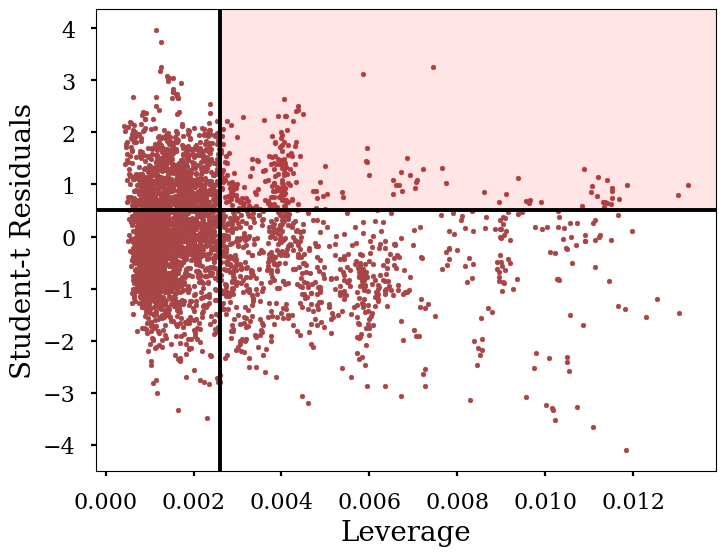

In [14]:
student_resid = influence.resid_studentized_external
leverage = influence.hat_matrix_diag
cutoff_leverage = (((2*NP[1])+2)/NP[0])*0.5
cutoff_student_resid = 0.5

plt.figure(figsize=(8,6))


plt.scatter(leverage, student_resid, s=11, c="#A84547")
plt.ylabel("Student-t Residuals",fontsize=20)
plt.xlabel("Leverage",fontsize=20)
plt.axvline(cutoff_leverage, c="k")
plt.axhline(cutoff_student_resid, c="k")

left, bottom, width, height = cutoff_leverage, cutoff_student_resid, max(leverage), max(student_resid)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="red")
plt.gca().add_patch(rect);
#plt.title("General Influential Points of the Decreasing Dataset");

plt.savefig(fig_path+"InfluentialPTS_decreased-DB5.pdf", format="pdf", dpi=800, bbox_inches='tight');

In [15]:
ge_infl = (pd.DataFrame([leverage,student_resid]).T).rename(columns={0:"leverage",1:"t_resid"})
ge_infl = ge_infl[ge_infl.leverage > cutoff_leverage]
ge_infl = ge_infl[ge_infl.t_resid  > cutoff_student_resid]

# Influential points found from DB5 dataset
ge_infl_DB5 = ge_infl[ge_infl.index  >= len(DB2)]
infl_DB5_ids = data[data.index.isin(ge_infl_DB5.index)].id.values

In [16]:
# Getting both DataFrames together | influential to maximize

R_infl =  R[R.id.isin( infl_DB5_ids )]

data_infl, regression_infl, NP_infl = get_regression(R_infl)
regression_infl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     5437.
Date:                Sat, 22 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:27:40   Log-Likelihood:                 533.16
No. Observations:                1435   AIC:                            -1048.
Df Residuals:                    1426   BIC:                            -1001.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5163      0.039    -64.531      0.000      -2.593      -2.440
x1             0.8818      0.025     34.748      0.000       0.832       0.932
x2             0.1193      0.024      5.068      0.000       0.073       0.166
x3             0.3447      0.019     18.242      0.000       0.308       0.382
x4            -0.6198      0.013    -48.366      0.000      -0.645      -0.595
x5             1.8578      0.045     41.586      0.000       1.770       1.945
x6             0.2745      0.041      6.689      0.000       0.194       0.355
x7             0.5600      0.051     10.932      0.000       0.459       0.660
x8             0.1876      0.030      6.252      0.000       0.129       0.246
==============================================================================
Omnibus:                       37.395   Durbin-Watson:                   0.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.610
Skew:                          -0.299   Prob(JB):                     2.78e-11
Kurtosis:                       3.675   Cond. No.                         48.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Getting both DataFrames together | not influential to maximize

R_not_infl = R[~R.id.isin( infl_DB5_ids )]

data_not_infl, regression_not_infl, NP_not_infl = get_regression(R_not_infl)
regression_not_infl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     7785.
Date:                Sat, 22 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:27:40   Log-Likelihood:                 689.57
No. Observations:                3729   AIC:                            -1361.
Df Residuals:                    3720   BIC:                            -1305.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4689      0.033    -73.798      0.000      -2.534      -2.403
x1             1.2926      0.020     65.071      0.000       1.254       1.331
x2             0.1020      0.017      6.060      0.000       0.069       0.135
x3            -0.0002      0.012     -0.018      0.985      -0.025       0.024
x4            -0.6292      0.010    -62.956      0.000      -0.649      -0.610
x5             1.0333      0.032     32.425      0.000       0.971       1.096
x6             0.1789      0.033      5.391      0.000       0.114       0.244
x7            -0.3242      0.044     -7.422      0.000      -0.410      -0.239
x8             0.1665      0.024      6.967      0.000       0.120       0.213
==============================================================================
Omnibus:                       11.348   Durbin-Watson:                   0.574
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.138
Skew:                           0.026   Prob(JB):                     0.000851
Kurtosis:                       3.297   Cond. No.                         59.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""